<a href="https://colab.research.google.com/github/psyuktha/document_tampering/blob/main/image_tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yukthaps","key":"b589172eb1f99e8025ad79ed7e8dd253"}'}

In [ ]:
!ls -lha kaggle.json


-rw-r--r-- 1 root root 64 Jun 13 10:45 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets list

ref                                                                   title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data        Online Sales Dataset - Popular Marketplace Data     7KB  2024-05-25 23:55:26           6225        118  1.0              
rabieelkharoua/cancer-prediction-dataset                              🩺📊 Cancer Prediction Dataset 🌟🔬                    47KB  2024-06-10 03:54:18           1298         28  1.0              
mexwell/pizza-sales                                                   🍕 Pizza Sales                                     586KB  2024-06-06 07:18:22           1559         29  1.0              
informrohit1/smartphones-dataset        

In [ ]:
!kaggle datasets download -d divg07/casia-20-image-tampering-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/divg07/casia-20-image-tampering-detection-dataset
License(s): unknown
... resuming from 2618294272 bytes (127235974 bytes left) ...
 99% 2.54G/2.56G [00:00<00:00, 136MB/s]
100% 2.56G/2.56G [00:00<00:00, 137MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "casia-20-image-tampering-detection-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
from PIL import Image, ImageChops, ImageEnhance
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    ela_image = ImageChops.difference(image, temp_image)
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    return ela_image

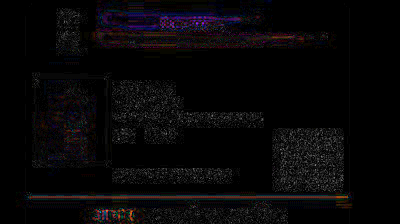

In [ ]:
convert_to_ela_image('/content/aa-Cover-vhobga052m2s92bvuc37ca5556-20170807014459.jpeg', 90)

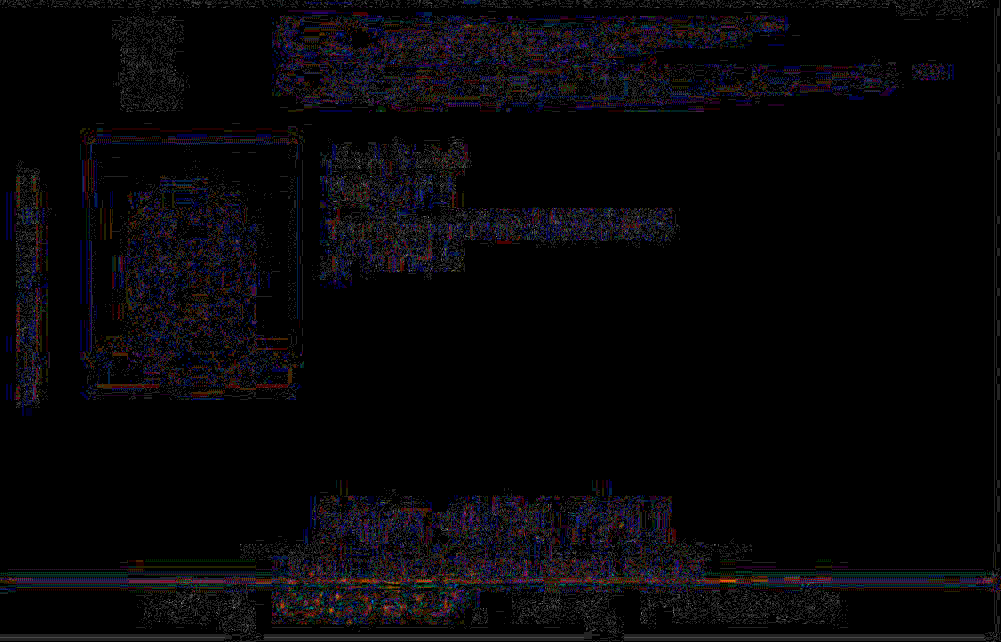

In [ ]:
convert_to_ela_image('/content/WhatsApp Image 2024-06-14 at 10.28.26.jpeg',90)

In [ ]:
image_size = (224,224)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
classes=["Tampered","Authentic"]

In [ ]:
data=[]

In [ ]:
import random
import os
import cv2
import numpy as np
# data=[]
# X = []
# y = []
path = '/content/CASIA2/Au'
print(os.walk(path))
for root, dirs, files in os.walk(path):
  for filename in files:
    file_path = os.path.join(root, filename)
    if filename.lower().endswith(('jpeg','jpg', 'png', 'tif', 'tiff')):
      data.append([prepare_image(file_path),1])

    if len(data)==1000:
        break


<generator object _walk at 0x7aabeff731b0>


In [ ]:
count = 0
path = '/content/CASIA2/Tp'
for root, dirs, files in os.walk(path):
    for filename in files:
        file_path = os.path.join(root, filename)
        if filename.lower().endswith(('jpeg','jpg', 'png', 'tif', 'tiff')):
            data.append([prepare_image(file_path),0])
            count += 1
        if len(data)==2000:
            break

In [ ]:
path = '/content/drive/MyDrive/Authentic'
print(os.walk(path))
for root, dirs, files in os.walk(path):
  for filename in files:
    file_path = os.path.join(root, filename)
    if filename.lower().endswith(('jpeg','jpg', 'png', 'tif', 'tiff')):
      data.append([prepare_image(file_path),1])



<generator object _walk at 0x7aabeff73300>


In [ ]:
path = '/content/drive/MyDrive/tampered '
print(os.walk(path))
for root, dirs, files in os.walk(path):

  for filename in files:

    file_path = os.path.join(root, filename)
    if filename.lower().endswith(('jpeg','jpg', 'png', 'tif', 'tiff')):

      data.append([prepare_image(file_path),0])



<generator object _walk at 0x7aabeff733e0>
3
2
2
1
2
2
1
2
2
2
1
2
1
2
2
2
2


In [ ]:
print(len(data))

2012


In [ ]:
X=[]
y=[]

In [ ]:
random.shuffle(data)
for features, label in data:
  X.append(features)
  y.append(label)
# import tensorflow as tf
# X=tf.constant(X)
# y=tf.constant(y)

X=tf.reshape(X,[-1, 224, 224, 3])


In [ ]:
from keras.utils import to_categorical
X = np.array(X)
y = np.array(y)
X = X.reshape(-1, 224, 224, 3)

In [ ]:
X.shape

(2018, 224, 224, 3)

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=5)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

1614 1614
404 404


In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import tensorflow as tf

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5,mode='max', restore_best_weights=True)

In [ ]:
model=Sequential()
tf.random.set_seed(42)
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(100,input_shape=X.shape[1:],activation='relu'))

model.add(Dense(1,activation='sigmoid'))



In [ ]:
Y_train[:32]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 epochs = 30,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/30
50/50 [==============================] - 16s 303ms/step - loss: 0.5902 - accuracy: 0.6488 - val_loss: 0.5602 - val_accuracy: 0.8225
Epoch 2/30
50/50 [==============================] - 14s 285ms/step - loss: 0.4478 - accuracy: 0.8381 - val_loss: 0.3800 - val_accuracy: 0.8400
Epoch 3/30
50/50 [==============================] - 14s 282ms/step - loss: 0.3746 - accuracy: 0.8631 - val_loss: 0.3734 - val_accuracy: 0.8500
Epoch 4/30
50/50 [==============================] - 14s 283ms/step - loss: 0.3557 - accuracy: 0.8644 - val_loss: 0.3549 - val_accuracy: 0.8575
Epoch 5/30
50/50 [==============================] - 14s 282ms/step - loss: 0.3306 - accuracy: 0.8756 - val_loss: 0.3984 - val_accuracy: 0.8150
Epoch 6/30
50/50 [==============================] - 14s 285ms/step - loss: 0.3273 - accuracy: 0.8744 - val_loss: 0.3500 - val_accuracy: 0.8675
Epoch 7/30
50/50 [==============================] - 14s 284ms/step - loss: 0.2800 - accuracy: 0.8944 - val_loss: 0.3673 - val_accuracy: 0.8625

In [ ]:
model.evaluate(X_val,Y_val)

13/13 [==============================] - 1s 59ms/step - loss: 0.3500 - accuracy: 0.8675


[0.3499619960784912, 0.8675000071525574]

In [ ]:
y_preds=model.predict(X_val)

13/13 [==============================] - 1s 61ms/step


In [ ]:
Y_preds=tf.squeeze(tf.round(y_preds))

In [ ]:
Y_val , Y_preds

(array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 

In [ ]:
img=prepare_image("/content/WhatsApp Image 2024-06-13 at 17.48.07.jpeg")

In [ ]:
classes[int(tf.round(model.predict(img.reshape(1,224,224,3)))[0])]

1/1 [==============================] - 0s 30ms/step


'Authentic'

In [ ]:
p=model.predict(img.reshape(1,224,224,3))[0]

1/1 [==============================] - 0s 31ms/step


In [ ]:
p,(1-p[0])*100

(array([0.99994874], dtype=float32), 0.005125999450683594)

In [ ]:
model.predict(img.reshape(1,224,224,3))

1/1 [==============================] - 0s 30ms/step


array([[0.20840378]], dtype=float32)

In [ ]:
model.save('/content/drive/MyDrive/image_tampering.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!wget https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.metrolawfirm.in%2Fproperty-documents-description-samples%2F&psig=AOvVaw2DQcKdmvF7NxH2ty5syOtL&ust=1718364748896000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCKiMrNS92IYDFQAAAAAdAAAAABAE

--2024-06-13 11:33:18--  https://www.google.com/url?sa=i
Resolving www.google.com (www.google.com)... 142.251.183.103, 142.251.183.105, 142.251.183.106, ...
Connecting to www.google.com (www.google.com)|142.251.183.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘url?sa=i’

url?sa=i                [ <=>                ]   1.36K  --.-KB/s    in 0s      

2024-06-13 11:33:18 (8.01 MB/s) - ‘url?sa=i’ saved [1389]



In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/image_tampering.h5')

In [ ]:
import keras

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
hist2 = model.fit(X_train,
                 Y_train,
                 epochs = 30,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])